# Importing CRU TS data

The Climate Research Unit gridded Time Series (CRU TS) is a widely used climate dataset on a 0.5° latitude by 0.5° longitude grid over all land domains of the world except Antarctica. The dataset is introduced in this [paper](https://doi.org/10.1038/s41597-020-0453-3).

In [23]:
from netCDF4 import Dataset
import numpy as np
from datetime import datetime, timedelta
import seaborn as sns
sns.set_theme(
    style="darkgrid",
    color_codes=True,
    palette='Dark2',
)

In [24]:
cru_file = Dataset('../data/CRU-TS/cru_ts4.05.1901.2020.tmp.dat.nc')
print(cru_file)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    Conventions: CF-1.4
    title: CRU TS4.05 Mean Temperature
    institution: Data held at British Atmospheric Data Centre, RAL, UK.
    source: Run ID = 2103051243. Data generated from:tmp.2103041709.dtb
    history: Fri  5 Mar 13:25:53 GMT 2021 : User harry : Program makegridsauto.for called by update.for
    references: Information on the data is available at http://badc.nerc.ac.uk/data/cru/
    comment: Access to these data is available to any registered CEDA user.
    contact: support@ceda.ac.uk
    dimensions(sizes): lon(720), lat(360), time(1440)
    variables(dimensions): float32 lon(lon), float32 lat(lat), float32 time(time), float32 tmp(time, lat, lon), int32 stn(time, lat, lon)
    groups: 


### Explore netCDF file

In [25]:
# variable information
cru_vars = [var for var in cru_file.variables]
for var in cru_vars:
    print('variable:', cru_file.variables[var],'\n')

variable: <class 'netCDF4._netCDF4.Variable'>
float32 lon(lon)
    long_name: longitude
    units: degrees_east
unlimited dimensions: 
current shape = (720,)
filling on, default _FillValue of 9.969209968386869e+36 used 

variable: <class 'netCDF4._netCDF4.Variable'>
float32 lat(lat)
    long_name: latitude
    units: degrees_north
unlimited dimensions: 
current shape = (360,)
filling on, default _FillValue of 9.969209968386869e+36 used 

variable: <class 'netCDF4._netCDF4.Variable'>
float32 time(time)
    long_name: time
    units: days since 1900-1-1
    calendar: gregorian
unlimited dimensions: time
current shape = (1440,)
filling on, default _FillValue of 9.969209968386869e+36 used 

variable: <class 'netCDF4._netCDF4.Variable'>
float32 tmp(time, lat, lon)
    long_name: near-surface temperature
    units: degrees Celsius
    correlation_decay_distance: 1200.0
    _FillValue: 9.96921e+36
    missing_value: 9.96921e+36
unlimited dimensions: time
current shape = (1440, 360, 720)
filli

In [26]:
# get the data (except tmp, too much data for now)
cru_lon = cru_file.variables['lon'][:]
cru_lat = cru_file.variables['lat'][:]
cru_time = cru_file.variables['time'][:]

print('time:')
print(cru_time)
print('lon:')
print(cru_lon[:10])
print('lat:')
print(cru_lat[:10])

time:
[  380.   410.   439. ... 44118. 44149. 44179.]
lon:
[-179.75 -179.25 -178.75 -178.25 -177.75 -177.25 -176.75 -176.25 -175.75
 -175.25]
lat:
[-89.75 -89.25 -88.75 -88.25 -87.75 -87.25 -86.75 -86.25 -85.75 -85.25]


The material was collected at the Biological Station Fringilla, a field station of the Zoological Institute of the Russian Academy of Sciences, located at 55°05'N, 20°44'E. This is equal to 55.08°N, 20.73°E. The closest grid point is therefore at **55.25°N, 20.75°E**.

*(Remember: 1 deg ° = 60 min)*

In [27]:
# get the index of the grid point at Fringilla
def get_index(cru_var, grid_point):
    i = 0
    for value in cru_var:
        if value == grid_point:
            print('index:',i)
            print('value:',cru_var[i])
            return i
        else:
            i += 1

ilon = get_index(cru_lon, 21.25)
ilat = get_index(cru_lat, 55.25)

index: 402
value: 21.25
index: 290
value: 55.25


In [28]:
# get tmp data at single grid point
cru_tmp = cru_file.variables['tmp'][:,ilat,ilon]
print('tmp:')
print(cru_tmp[1400:1420])


tmp:
[14.3        9.1        5.         2.3       -0.8       -4.2000003
 -0.8       10.1       16.2       17.4       20.300001  20.1
 15.900001   9.900001   4.5        0.6       -2.5        1.8000001
  3.9        8.6      ]


In [29]:
np.shape(cru_tmp)

(1440,)

time variable is stored as days since 1900-1-1, let's convert it to an actual date,

In [30]:
cru_date = []
start = datetime(1900,1,1)
for i, time in enumerate(cru_time):
    delta = timedelta(int(cru_time[i]))
    cru_date.append(start + delta)

and plot the temperature in April of 1998-2020.

<AxesSubplot:>

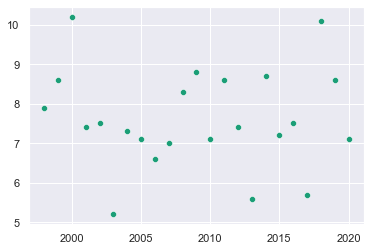

In [31]:
yfirst = 1998
ylast = 2020
yrs = np.arange(1998, 2020+1)

tmp = np.zeros(len(yrs))
j = 0
for i, ttmp in enumerate(cru_tmp):
    # "cru_date" and "cru_tmp" have same shape of (1440,)
    if cru_date[i].year >= yfirst and cru_date[i].month == 4:
        tmp[j] = cru_tmp[i]
        j += 1

# plotting
sns.scatterplot(x=yrs, y=tmp)

In [32]:
# save tmp from cru ts dataset
# https://ipython.org/ipython-doc/rel-0.12/config/extensions/storemagic.html
cru_tmp_aprl = tmp
%store cru_tmp_aprl

Stored 'cru_tmp_aprl' (ndarray)
